# Explore here

In [ ]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


In [13]:
import pandas as pd
import os

# Definir la URL del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

# Cargar datos correctamente especificando el delimitador
df = pd.read_csv(url, sep=";")

# Crear carpeta y guardar el archivo
raw_data_path = "./data/raw"
os.makedirs(raw_data_path, exist_ok=True)
df.to_csv(f"{raw_data_path}/bank-marketing-campaign-data.csv", index=False)

print("Datos cargados correctamente y almacenados en './data/raw'")

Datos cargados correctamente y almacenados en './data/raw'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

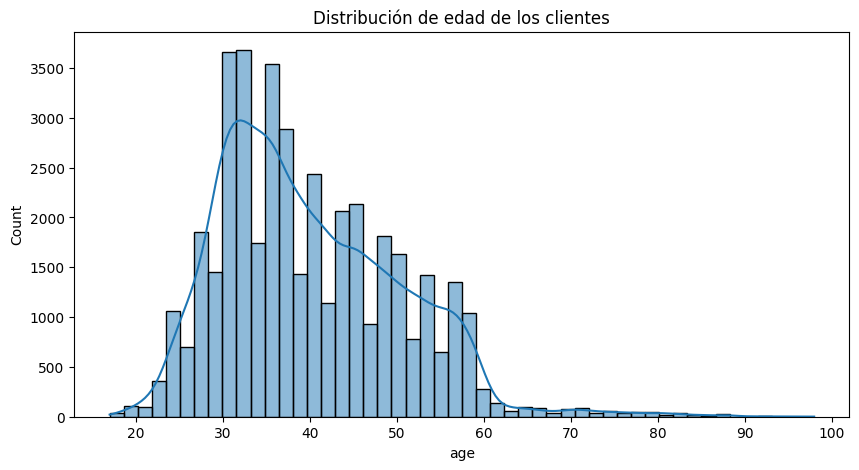

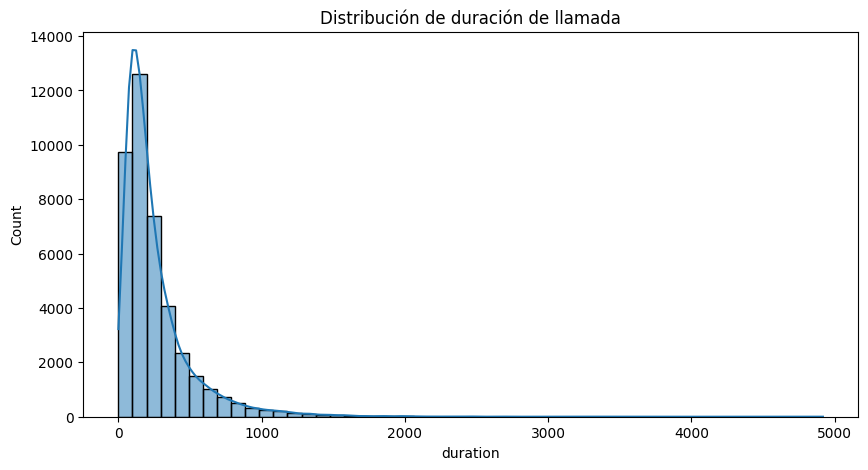

In [14]:
# Ver información general
print(df.info())

# Ver estadísticas descriptivas
print(df.describe())

# Ver primeras filas
print(df.head())

# Identificar valores nulos
print(df.isnull().sum())

# Identificar valores duplicados
print("Número de filas duplicadas:", df.duplicated().sum())

# Visualización de distribución de variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=50, kde=True)
plt.title("Distribución de edad de los clientes")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['duration'], bins=50, kde=True)
plt.title("Distribución de duración de llamada")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Selección de variables relevantes
columns_to_keep = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
                   'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 
                   'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
df_filtered = df[columns_to_keep]

# Codificar variable objetivo
df_filtered['y'] = df_filtered['y'].map({'yes': 1, 'no': 0})

# División en Train/Test
train, test = train_test_split(df_filtered, test_size=0.2, random_state=42)

# Guardar datos procesados
processed_data_path = "./data/processed"
os.makedirs(processed_data_path, exist_ok=True)
train.to_csv(f"{processed_data_path}/train.csv", index=False)
test.to_csv(f"{processed_data_path}/test.csv", index=False)

print("Datos procesados guardados en './data/processed'")

Datos procesados guardados en './data/processed'


In [ ]:


# Definir características categóricas y numéricas
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Transformaciones
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Definir el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Separar características y objetivo
X_train = train.drop(columns=['y'])
y_train = train['y']
X_test = test.drop(columns=['y'])
y_test = test['y']

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.9113


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a optimizar
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Evaluación del modelo optimizado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Precisión del modelo optimizado: {accuracy_best:.4f}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Precisión del modelo optimizado: 0.9110


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
